In [1]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator, NullFormatter
import seaborn as sns

# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
from pathlib import Path

repo_root = Path.cwd().parent
os.chdir(repo_root)
print(os.getcwd())
#print(os.listdir("raw_plate_reader"))
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

Using `neutcurve` version 2.1.0
/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut


In [2]:
#warnings.simplefilter('ignore')
#theme_set(theme_seaborn(style='white', context='talk', font_scale=1))

In [3]:
df = pd.read_csv('01_data/other/RSVNeut_FractionInfectivity_NIBSC_A2_complete.csv')

In [4]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

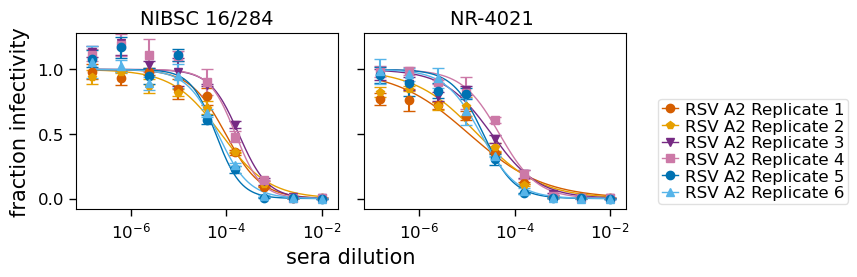

In [5]:
fig, axes = fits.plotSera(
    xlabel='sera dilution', 
    max_viruses_per_subplot=6, 
    colors=['#D55E00', '#E69F00', '#762A83', '#CC79A7', '#0072B2', '#56B4E9', '#009E73', 
            '#1B7837', '#000000', '#999999', '#F0E442'], 
    markers=['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
    draw_in_bounds=True, 
    ncol=2, 
    sharex=False, 
    sharey=True, 
    #legendfontsize=14
)

fig.savefig('03_output/plots/BEI_NeutCurves_NIBSC_A2.svg', bbox_inches='tight')


In [6]:
fits.fitParams()

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd
0,NIBSC 16/284,RSV A2 Replicate 1,average,3,0.000098,interpolated,9.76e-05,0.000098,0.000098,interpolated,1.162105,1.0,0.0,0.990482,0.040075
1,NIBSC 16/284,RSV A2 Replicate 2,average,3,0.000078,interpolated,7.82e-05,0.000078,0.000078,interpolated,0.860143,1.0,0.0,0.987289,0.043828
2,NIBSC 16/284,RSV A2 Replicate 3,average,3,0.000183,interpolated,0.000183,0.000183,0.000183,interpolated,1.443893,1.0,0.0,0.967965,0.083378
3,NIBSC 16/284,RSV A2 Replicate 4,average,3,0.000157,interpolated,0.000157,0.000157,0.000157,interpolated,1.588694,1.0,0.0,0.963887,0.092056
4,NIBSC 16/284,RSV A2 Replicate 5,average,3,0.000061,interpolated,6.07e-05,0.000061,0.000061,interpolated,1.651884,1.0,0.0,0.967062,0.088686
5,NIBSC 16/284,RSV A2 Replicate 6,average,3,0.000067,interpolated,6.72e-05,0.000067,0.000067,interpolated,1.325241,1.0,0.0,0.991375,0.040931
6,NR-4021,RSV A2 Replicate 1,average,3,0.000011,interpolated,1.11e-05,0.000011,0.000011,interpolated,0.555899,1.0,0.0,0.943317,0.078450
7,NR-4021,RSV A2 Replicate 2,average,3,0.000017,interpolated,1.66e-05,0.000017,0.000017,interpolated,0.662613,1.0,0.0,0.952781,0.077249
8,NR-4021,RSV A2 Replicate 3,average,3,0.000033,interpolated,3.29e-05,0.000033,0.000033,interpolated,0.873834,1.0,0.0,0.976591,0.059635
9,NR-4021,RSV A2 Replicate 4,average,3,0.000048,interpolated,4.82e-05,0.000048,0.000048,interpolated,1.099824,1.0,0.0,0.993580,0.033505


In [7]:
fits.fitParams().to_csv("03_output/processed_data/IC50s_NIBSC_A2.csv")